# Natural Language Processing (NLP)

## Introduction

*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

### What is NLP?

- Using computers to process (analyze, understand, generate) natural human languages
- Most knowledge created by humans is unstructured text, and we need a way to make sense of it
- Build probabilistic model using data about a language
- Also referred to as machine learning with text.

### What are some of the higher level task areas?

- **Information retrieval**: Find relevant results and similar results
    - [Google](https://www.google.com/)
- **Information extraction**: Structured information from unstructured documents
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation**: One language to another
    - [Google Translate](https://translate.google.com/)
- **Text simplification**: Preserve the meaning of text, but simplify the grammar and vocabulary
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input**: Faster or easier typing
    - [A friend's application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis**: Attitude of speaker
    - [Hater News](http://haternews.herokuapp.com/)
- **Automatic summarization**: Extractive or abstractive summarization
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural Language Generation**: Generate text from data
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation**: Speech-to-text, text-to-speech
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering**: Determine the intent of the question, match query with knowledge base, evaluate hypotheses
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What are some of the lower level components?

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Part-of-speech tagging**: noun/verb/adjective
- **Named entity recognition**: person/organization/location
- **Spelling correction**: "New Yrok City"
- **Word sense disambiguation**: "buy a mouse"
- **Segmentation**: "New York City subway"
- **Language detection**: "translate this page"
- **Machine learning**

### Why is NLP hard?

- **Ambiguity**:
    - Hospitals are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English**: text messages
- **Idioms**: "throw in the towel"
- **Newly coined words**: "retweet"
- **Tricky entity names**: "Where is A Bug's Life playing?"
- **World knowledge**: "Mary and Sue are sisters", "Mary and Sue are mothers"
- **Texts with the same words and phrases can having different meanings **: 
State farm commercial where two different people say "Is this my car? What? This is ridiculous! This can't be happening! Shut up! Ahhhh!!!"


NLP requires an understanding of the **language** and the **world**.

## Part 1: Reading in the Yelp Reviews

- "corpus" = collection of documents
- "corpora" = plural form of corpus

In [2]:
import nltk

In [5]:
import textblob

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline


C:\Users\zyousefi.ORADEV\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# read yelp.csv into a DataFrame
url = 'yelp.csv'
yelp = pd.read_csv(url, encoding='unicode-escape')

In [8]:
# Create a new DataFrame called yelp_best_worst that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)] #why????

In [9]:
yelp_best_worst.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [10]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars
print y.value_counts(normalize=True)

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

5    0.816691
1    0.183309
Name: stars, dtype: float64


In [11]:
X_train[0]

u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

## Part 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [12]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [13]:
# Term Frequency
vect = CountVectorizer()
dtm = vect.fit_transform(simple_train)
tf = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [14]:
# transforming a new sentence, what do you notice?
new_sentence = ['please call yourself a cab']
pd.DataFrame(vect.transform(new_sentence).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,1,0,1,0,0


In [15]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [16]:
# rows are documents, columns are terms (phrases) (aka "tokens" or "features")
print X_train_dtm.shape
print X_test_dtm.shape
# Why do they have the same number of features

(3064, 16825)
(1022, 16825)


In [17]:
# first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'00a', u'00am', u'00pm', u'01', u'02', u'03', u'03342', u'04', u'05', u'06', u'07', u'09', u'0buxoc0crqjpvkezo3bqog', u'0l', u'10', u'100', u'1000', u'1000x', u'1001', u'100th', u'101', u'102', u'105', u'1070', u'108', u'10am', u'10ish', u'10min', u'10mins', u'10minutes', u'10pm', u'10th', u'10x', u'11', u'110', u'1100', u'111', u'111th', u'112', u'115th', u'118', u'11a', u'11am', u'11p', u'11pm', u'12', u'120', u'128i']


In [18]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'yyyyy', u'z11', u'za', u'zabba', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zero', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zihuatenejo', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zippers', u'zipps', u'ziti', u'zoe', u'zombi', u'zombies', u'zone', u'zones', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


In [19]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [23]:
#Create a count vectorizer that doesn't lowercase the words
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape # has more features

(3064, 20838)

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [24]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

In [25]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zone out', u'zone when', u'zones', u'zones dolls', u'zoning', u'zoning issues', u'zoo', u'zoo and', u'zoo is', u'zoo not', u'zoo the', u'zoo ve', u'zoyo', u'zoyo for', u'zucca', u'zucca appetizer', u'zucchini', u'zucchini and', u'zucchini bread', u'zucchini broccoli', u'zucchini carrots', u'zucchini fries', u'zucchini pieces', u'zucchini strips', u'zucchini veal', u'zucchini very', u'zucchini with', u'zuchinni', u'zuchinni again', u'zuchinni the', u'zumba', u'zumba class', u'zumba or', u'zumba yogalates', u'zupa', u'zupa flavors', u'zuzu', u'zuzu in', u'zuzu is', u'zuzu the', u'zwiebel', u'zwiebel kr\xe4uter', u'zzed', u'zzed in', u'\xe9clairs', u'\xe9clairs napoleons', u'\xe9cole', u'\xe9cole len\xf4tre', u'\xe9m', u'\xe9m all']


**Predicting the star rating with Naive Bayes**

We will use [multinomial Naive Bayes](https://www.analyticsvidhya.com/blog/2015/09/naive-bayes-explained/):

"It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’."

For more explanation on NB click on link.


### <b>Pros</b>: 
#### - Very fast. Adept at handling tens of thousands of features which is why it's used for text classification
#### - Works well with a small number of observations
#### - Isn't negatively affected by "noise"

### <b>Cons</b>:
#### - Useless for probabilities. Most of the time assigns probabilites that are close to zero or one ????
#### - It is literally "naive". Nearly impossible to have a set of features that are independent.

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
#test model on the whole data then do a cross valdiation
vect = CountVectorizer()
Xdtm = vect.fit_transform(X)
nb = MultinomialNB()
nb.fit(Xdtm, y)
nb.score(Xdtm, y)

0.97185511502692123

In [28]:
# make a countvectorizer for a train test split
vect = CountVectorizer()
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use multinomial naive bayes with document feature matrix, NOT the text column
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.918786692759


In [29]:
# calculate null accuracy, which is the accuracy of our null model (just guessing the most common thing) ?????
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.81996086105675148

In [30]:
# Predict on new text
new_text = ["I had a decent time at this restaurant. The food was delicious but the service was poor. I recommend the salad but do not eat the french fries."]
new_text_transform = vect.transform(new_text)

In [38]:
nb.predict(new_text_transform) # WHICH STAR
nb.predict_proba(new_text_transform) #PROBABILITY OF 1 AND 5

array([[ 0.0927211,  0.9072789]])

In [39]:
# EXERCISE define a function, tokenize_test,  that does five things:
def tokenize_test(vect):
    nb = MultinomialNB()
    X_dtm = vect.fit_transform(X)
    print 'Features: ', X_dtm.shape[1]
    print 'Accuracy: ', cross_val_score(nb, X_dtm, y, cv=5, scoring='accuracy').mean()


In [40]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2)) #bigram,3gram
tokenize_test(vect)

Features:  209471
Accuracy:  0.893546012268


## Part 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [41]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If a word is equally like to show up in a rap lyric as medical paper then its most likely a stop word.
- Corpus-specific stopwords, that words that aren't regular stopwords but become stopwords depending on the context.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [42]:
# remove English stop words
stop=[]
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
tokenize_test(vect)

Features:  191336
Accuracy:  0.917289645057


In [43]:
# set of stop words
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

## Part 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [44]:
# remove English stop words and only keep 100 features, MUCH FASTER
vect = CountVectorizer(stop_words='english', max_features=500) #100 to 500
tokenize_test(vect)

Features:  500
Accuracy:  0.902110055491


In [45]:
# all 100 features
print vect.get_feature_names()

[u'10', u'12', u'15', u'20', u'30', u'50', u'able', u'absolutely', u'actually', u'add', u'ago', u'amazing', u'appetizer', u'area', u'arizona', u'arrived', u'ask', u'asked', u'ate', u'atmosphere', u'attentive', u'authentic', u'away', u'awesome', u'az', u'bacon', u'bad', u'bar', u'bbq', u'beans', u'beautiful', u'beef', u'beer', u'believe', u'best', u'better', u'big', u'birthday', u'bit', u'bite', u'black', u'bowl', u'bread', u'breakfast', u'bring', u'brought', u'burger', u'burrito', u'business', u'busy', u'butter', u'buy', u'cafe', u'cake', u'called', u'came', u'car', u'card', u'care', u'charge', u'cheap', u'check', u'cheese', u'chef', u'chicken', u'chinese', u'chips', u'chocolate', u'choice', u'choose', u'clean', u'close', u'coffee', u'cold', u'come', u'comes', u'comfortable', u'coming', u'completely', u'cooked', u'cool', u'cost', u'couldn', u'counter', u'couple', u'course', u'cream', u'customer', u'customers', u'cut', u'cute', u'date', u'daughter', u'day', u'days', u'deal', u'decided',

In [46]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=10000)
tokenize_test(vect)

Features:  10000
Accuracy:  0.929517275842


- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [49]:
# include 1-grams and 2-grams, and only include terms that appear at least 3 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=3)
tokenize_test(vect)

Features:  32700
Accuracy:  0.935396625873


## Part 5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [50]:
# print the first review
print yelp_best_worst.text[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [51]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [53]:
# list the words
review.words[:50]

WordList([u'My', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excellent', u'The', u'weather', u'was', u'perfect', u'which', u'made', u'sitting', u'outside', u'overlooking', u'their', u'grounds', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'was', u'excellent', u'and', u'our', u'food', u'arrived', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'looked', u'like', u'the', u'place', u'fills', u'up', u'pretty'])

In [54]:
# list the sentences
review.sentences[:5]

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary.")]

In [55]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

In [56]:
# Parts-of-speech tagging. Identifies nouns, verbs, adverbs, etc...
review.tags

[(u'My', u'PRP$'),
 (u'wife', u'NN'),
 (u'took', u'VBD'),
 (u'me', u'PRP'),
 (u'here', u'RB'),
 (u'on', u'IN'),
 (u'my', u'PRP$'),
 (u'birthday', u'NN'),
 (u'for', u'IN'),
 (u'breakfast', u'NN'),
 (u'and', u'CC'),
 (u'it', u'PRP'),
 (u'was', u'VBD'),
 (u'excellent', u'JJ'),
 (u'The', u'DT'),
 (u'weather', u'NN'),
 (u'was', u'VBD'),
 (u'perfect', u'JJ'),
 (u'which', u'WDT'),
 (u'made', u'VBD'),
 (u'sitting', u'VBG'),
 (u'outside', u'IN'),
 (u'overlooking', u'VBG'),
 (u'their', u'PRP$'),
 (u'grounds', u'NNS'),
 (u'an', u'DT'),
 (u'absolute', u'JJ'),
 (u'pleasure', u'NN'),
 (u'Our', u'PRP$'),
 (u'waitress', u'NN'),
 (u'was', u'VBD'),
 (u'excellent', u'JJ'),
 (u'and', u'CC'),
 (u'our', u'PRP$'),
 (u'food', u'NN'),
 (u'arrived', u'VBD'),
 (u'quickly', u'RB'),
 (u'on', u'IN'),
 (u'the', u'DT'),
 (u'semi-busy', u'JJ'),
 (u'Saturday', u'NNP'),
 (u'morning', u'NN'),
 (u'It', u'PRP'),
 (u'looked', u'VBD'),
 (u'like', u'IN'),
 (u'the', u'DT'),
 (u'place', u'NN'),
 (u'fills', u'VBZ'),
 (u'up', u'R

POS Tags guide: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

## Part 6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [57]:
# initialize stemmer
stemmer = SnowballStemmer('english')

Compare and contrast the words with their stems.

In [58]:
review.words[:100]

WordList([u'My', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excellent', u'The', u'weather', u'was', u'perfect', u'which', u'made', u'sitting', u'outside', u'overlooking', u'their', u'grounds', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'was', u'excellent', u'and', u'our', u'food', u'arrived', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'looked', u'like', u'the', u'place', u'fills', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'was', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'had', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredients', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'was'])

In [59]:
# stem each word
print [stemmer.stem(word) for word in review.words[:100]]

[u'my', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excel', u'the', u'weather', u'was', u'perfect', u'which', u'made', u'sit', u'outsid', u'overlook', u'their', u'ground', u'an', u'absolut', u'pleasur', u'our', u'waitress', u'was', u'excel', u'and', u'our', u'food', u'arriv', u'quick', u'on', u'the', u'semi-busi', u'saturday', u'morn', u'it', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretti', u'quick', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'bloodi', u'mari', u'it', u'was', u'phenomen', u'and', u'simpli', u'the', u'best', u'i', u've', u'ever', u'had', u'i', u"'m", u'pretti', u'sure', u'they', u'onli', u'use', u'ingredi', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'it', u'was']


**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [60]:
from nltk.stem.wordnet import WordNetLemmatizer

In [61]:
word = Word('indices')
stemmer.stem(word)

u'indic'

In [62]:
lem = WordNetLemmatizer()

In [69]:
#Try it with words that look very different when pluralized like indices and octopi/ better
lem.lemmatize("indices")

u'index'

Compare and contrast the originals words with their "lemons"

In [70]:
print [word for word in review.words[:100]]

[u'My', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'was', u'excellent', u'The', u'weather', u'was', u'perfect', u'which', u'made', u'sitting', u'outside', u'overlooking', u'their', u'grounds', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'was', u'excellent', u'and', u'our', u'food', u'arrived', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'looked', u'like', u'the', u'place', u'fills', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'was', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'had', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredients', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'was']


In [71]:
# assume every word is a noun
print [word.lemmatize() for word in review.words[:100]]

[u'My', u'wife', u'took', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'wa', u'excellent', u'The', u'weather', u'wa', u'perfect', u'which', u'made', u'sitting', u'outside', u'overlooking', u'their', u'ground', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'wa', u'excellent', u'and', u'our', u'food', u'arrived', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'looked', u'like', u'the', u'place', u'fill', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'wa', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'had', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredient', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'wa']


In [72]:
# assume every word is a verb
print [word.lemmatize(pos='v') for word in review.words]

[u'My', u'wife', u'take', u'me', u'here', u'on', u'my', u'birthday', u'for', u'breakfast', u'and', u'it', u'be', u'excellent', u'The', u'weather', u'be', u'perfect', u'which', u'make', u'sit', u'outside', u'overlook', u'their', u'ground', u'an', u'absolute', u'pleasure', u'Our', u'waitress', u'be', u'excellent', u'and', u'our', u'food', u'arrive', u'quickly', u'on', u'the', u'semi-busy', u'Saturday', u'morning', u'It', u'look', u'like', u'the', u'place', u'fill', u'up', u'pretty', u'quickly', u'so', u'the', u'earlier', u'you', u'get', u'here', u'the', u'better', u'Do', u'yourself', u'a', u'favor', u'and', u'get', u'their', u'Bloody', u'Mary', u'It', u'be', u'phenomenal', u'and', u'simply', u'the', u'best', u'I', u"'ve", u'ever', u'have', u'I', u"'m", u'pretty', u'sure', u'they', u'only', u'use', u'ingredients', u'from', u'their', u'garden', u'and', u'blend', u'them', u'fresh', u'when', u'you', u'order', u'it', u'It', u'be', u'amaze', u'While', u'EVERYTHING', u'on', u'the', u'menu', u'l

In [73]:
# define a function that accepts text and returns a list of lemmas
def word_tokenize_stem(text):
    words = TextBlob(text).words
    return [stemmer.stem(word) for word in words]
def word_tokenize_lemma(text):
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]
def word_tokenize_lemma_verb(text):
    words = TextBlob(text).words
    return [word.lemmatize(pos='v') for word in words]

In [76]:
# use word_tokenize LEMMA as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=word_tokenize_stem)
tokenize_test(vect)

Features:  15237
Accuracy:  0.920713524267


In [77]:
# use word_tokenize STEM as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=word_tokenize_lemma)
tokenize_test(vect)

Features:  23856
Accuracy:  0.912390384251


## Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents). Court, ball, shooting, passing will show up frequently in a basketball corpus, but essentially add no meaning.
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [78]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [79]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [80]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [81]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


In [82]:
# TfidfVectorizer. Why does please have the highest score?
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


**More details:** [TF-IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

In [85]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [86]:
vect = TfidfVectorizer(stop_words='english')
tokenize_test(vect)

Features:  18883
Accuracy:  0.817671138582


## Part 8: Sentiment Analysis

In [87]:
print review

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [89]:
review.sentiment # POLARITY -1 0 1

Sentiment(polarity=0.40246913580246907, subjectivity=0.6591122868900646)

In [90]:
#Apply polarity and sentiment over yelp reviews df
yelp["polarity"] = yelp.text.apply(lambda x:TextBlob(x).polarity)
yelp["subjectivity"] = yelp.text.apply(lambda x:TextBlob(x).subjectivity)

In [91]:
yelp["review_length"] = yelp.text.str.len()

In [92]:
pd.set_option('max_colwidth', 500)

In [93]:
yelp[yelp.polarity == 1].text.head()

254                                                                                                                                                                             Our server Gary was awesome. Food was amazing...an experience.
347                                                                                                                                                           3 syllables for this place. \r\nA-MAZ-ING!\r\n\r\nThe best Phoenix has to offer.
420                                                                                                                                                                                                                          LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as Chino is the one thing we miss. Every time I think about Chino Bandido my mouth starts watering. If I am ever in the state again I will drive out of my way just to go to it again. YUMMY!
679                                         

In [94]:
yelp[yelp.polarity == -1].text.head()

773     This was absolutely horrible. I got the supreme pizza with the mystery meats.  I threw it in the trash. I will wait until I get to my destination to eat. Horrible!!!
1517                                                                                                                                      Nasty workers and over priced trash
3266                                                                                                         Absolutely awful... these guys have NO idea what they are doing!
4766                                                                                                                                                           Very bad food!
5812                                                                                                                            I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [95]:
yelp[(yelp.stars == 5) & (yelp.polarity < -0.3)]["text"].head(2) #FALSE NEGATIVE

390     RIP AZ Coffee Connection.  :(  I stopped by two days ago unaware that they had closed.  I am severely bummed.  This place is irreplaceable!  Damn you, Starbucks and McDonalds!
1287                                             Obsessed. Like, I've-got-the-Twangy-Tart-withdrawal-shakes level of addiction to this place. Please make one in Arcadia! Pleeeaaassse.
Name: text, dtype: object

In [96]:
yelp[(yelp.stars == 1) & (yelp.polarity > 0.5)]["text"].head(2)

1781                                                                                                                                                                                                                                                                     If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.
2353    My co-workers and I refer to this place as "Pizza n' Ants".  The staff will be happy to serve you with bare hands, right after using the till.  Also, as the nickname suggests, there has been a noticable insect problem. \r\r\n\r\r\nAs if that could all be overlooked, the pizza isn't even good.  If you are in this part of town, go to Z Pizza or Slices for great pizza instead!
Name: text, dtype: object

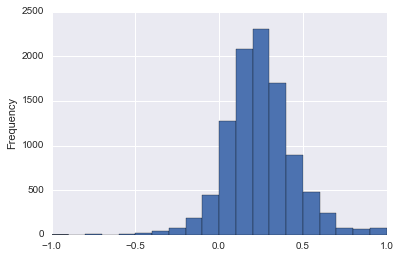

In [97]:
yelp.polarity.plot(kind="hist", bins=20);

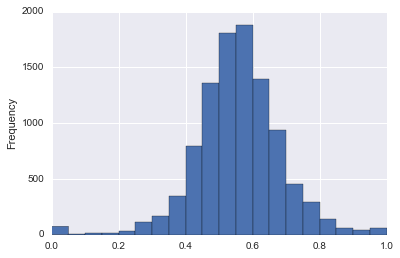

In [98]:
yelp.subjectivity.plot(kind="hist", bins=20)

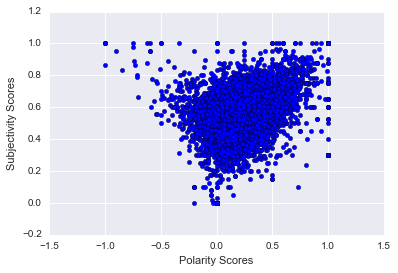

In [99]:
#Plot scatter plot of polarity vs subjectivity scores
plt.scatter(yelp.polarity, yelp.subjectivity)
plt.xlabel("Polarity Scores")
plt.ylabel("Subjectivity Scores")

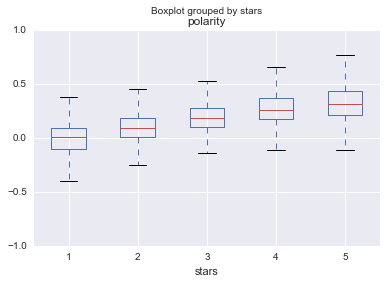

In [100]:
#Plot boxplots of the polarity by yelp stars
yelp.boxplot(column='polarity', by='stars')

## Part 9: Calculating "spaminess" of a token

In [101]:
#Load in ham or spam text dataset
df = pd.read_table("sms.tsv",encoding="utf-8", names= ["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [102]:
#Look at null accuracy
df.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [103]:
X = df.message
y = df.label
vect =CountVectorizer()
Xdtm = vect.fit_transform(X)
nb = MultinomialNB()
nb.fit(Xdtm,y)
nb.score(Xdtm,y)

0.99353912419239054

In [104]:
tokens = vect.get_feature_names()
len(tokens)

8713

In [105]:
#Print first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'000pes', u'008704050406', u'0089', u'0121', u'01223585236', u'01223585334', u'0125698789', u'02', u'0207', u'02072069400', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703', u'0578', u'06', u'07', u'07008009200', u'07046744435', u'07090201529', u'07090298926', u'07099833605', u'07123456789', u'0721072', u'07732584351', u'07734396839', u'07742676969', u'07753741225', u'0776xxxxxxx', u'07781482378', u'07786200117', u'077xxx', u'078', u'07801543489', u'07808', u'07808247860', u'07808726822', u'07815296484', u'07821230901', u'078498', u'07880867867', u'0789xxxxxxx', u'07946746291', u'0796xxxxxx']


In [106]:
#Print random slice of features
print vect.get_feature_names()[3200:3250]

[u'fifteen', u'fifth', u'fifty', u'fight', u'fighting', u'fightng', u'fights', u'figure', u'figures', u'figuring', u'file', u'files', u'fill', u'filled', u'filling', u'fills', u'film', u'films', u'filth', u'filthy', u'filthyguys', u'final', u'finalise', u'finally', u'finance', u'financial', u'find', u'finding', u'finds', u'fine', u'finest', u'fingers', u'finish', u'finishd', u'finished', u'finishes', u'finishing', u'fink', u'finn', u'fire', u'fired', u'firefox', u'fireplace', u'fires', u'firmware', u'firsg', u'first', u'fish', u'fishhead', u'fishrman']


In [116]:
#How many times does a word appear in each class HAM AND SPAM
nb.feature_count_

array([[  0.,   0.,   1., ...,   1.,   0.,   1.],
       [ 10.,  29.,   0., ...,   0.,   1.,   0.]])

In [117]:
nb.feature_count_.shape

(2L, 8713L)

In [118]:
ham_token_count = nb.feature_count_[0,:]
ham_token_count

array([ 0.,  0.,  1., ...,  1.,  0.,  1.])

In [119]:
spam_token_count = nb.feature_count_[1, :]
spam_token_count

array([ 10.,  29.,   0., ...,   0.,   1.,   0.])

In [120]:
# create a DataFrame of tokens with their separate ham and spam counts
df_tokens = pd.DataFrame({'token':tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')
df_tokens.sample(10, random_state=3)

,ham,spam
token,,
missions,1.0,0.0
residency,1.0,0.0
reset,1.0,0.0
chat80155,0.0,1.0
tight,2.0,0.0
another,35.0,2.0
gentleman,3.0,0.0
apply,2.0,30.0
4the,1.0,0.0


In [121]:
# add 1 to ham and spam counts to avoid dividing by 0
df_tokens['ham'] = df_tokens.ham + 1
df_tokens['spam'] = df_tokens.spam + 1
df_tokens.sample(10, random_state=3)

,ham,spam
token,,
missions,2.0,1.0
residency,2.0,1.0
reset,2.0,1.0
chat80155,1.0,2.0
tight,3.0,1.0
another,36.0,3.0
gentleman,4.0,1.0
apply,3.0,31.0
4the,2.0,1.0


In [122]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([ 4825.,   747.])

In [123]:
# convert the ham and spam counts into frequencies
df_tokens['ham'] = df_tokens.ham / nb.class_count_[0]
df_tokens['spam'] = df_tokens.spam / nb.class_count_[1]
df_tokens.sample(10, random_state=3)

,ham,spam
token,,
missions,0.000415,0.001339
residency,0.000415,0.001339
reset,0.000415,0.001339
chat80155,0.000207,0.002677
tight,0.000622,0.001339
another,0.007461,0.004016
gentleman,0.000829,0.001339
apply,0.000622,0.041499
4the,0.000415,0.001339


In [125]:
# calculate the ratio of spam-to-ham for each token
df_tokens['spam_ratio'] = df_tokens.spam / df_tokens.ham
df_tokens.sample(10, random_state=3)

,ham,spam,spam_ratio
token,,,
missions,0.000415,0.001339,3.229585
residency,0.000415,0.001339,3.229585
reset,0.000415,0.001339,3.229585
chat80155,0.000207,0.002677,12.918340
tight,0.000622,0.001339,2.153057
another,0.007461,0.004016,0.538264
gentleman,0.000829,0.001339,1.614793
apply,0.000622,0.041499,66.744757
4the,0.000415,0.001339,3.229585


In [128]:
# examine the DataFrame sorted by spam_ratio
df_tokens.sort_values('spam_ratio', ascending=False).head(10) #tRUE GIVES THE MOST HAM

,ham,spam,spam_ratio
token,,,
claim,0.000207,0.152610,736.345382
prize,0.000207,0.125837,607.161981
150p,0.000207,0.096386,465.060241
tone,0.000207,0.081660,394.009371
18,0.000207,0.069612,335.876841
guaranteed,0.000207,0.068273,329.417671
500,0.000207,0.060241,290.662651
cs,0.000207,0.060241,290.662651
1000,0.000207,0.056225,271.285141


In [130]:
#Try looking up scores of different words
word = "win"
df_tokens.loc[word, 'spam_ratio']

32.295850066934406

## Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible

In [131]:
ls

 Volume in drive C is System
 Volume Serial Number is BE9F-4BD2

 Directory of c:\users\zyousefi.oradev\documents\ds-sf-31-zyousefi\lessons\lesson11

02/23/2017  08:20 PM    <DIR>          .
02/23/2017  08:20 PM    <DIR>          ..
02/23/2017  06:23 PM    <DIR>          .ipynb_checkpoints
02/23/2017  06:15 PM        11,878,117 fake_or_real_news.csv.zip
02/23/2017  08:20 PM           181,899 NLP Lesson.ipynb
02/23/2017  06:15 PM        24,044,504 pitchfork.csv
02/23/2017  06:15 PM           483,481 sms.tsv
02/23/2017  06:15 PM                 2 t
02/23/2017  07:29 PM             1,761 Untitled.ipynb
02/23/2017  06:15 PM         8,135,625 yelp.csv
               7 File(s)     44,725,389 bytes
               3 Dir(s)  248,634,855,424 bytes free


# Lab time
- There are three other datasets pitchfork album reviews, fake/real news, and political lean.
- Pick one of those three datasets and try to build a model that differentiate between good/bad review, real/fake news, or liberal/conservative leaning. Make sure to examine the false positives and the false negatives texts. Use the "spamminess" technique on the corpus as well. 
- Use both count and tfidf vectorizers. Use textblob to determine sentiment and polarity.
- I've included some bonus material if you want to explore. 
    
    -How to summarize a text
    
    -How to use gridsearch to find the optimal parameters for countvectorizer.
    

In [ ]:
#df.sample(frac=.5)

## Bonus: Using TF-IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [132]:
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(yelp.text)
features = tfidf.get_feature_names()

In [ ]:
def summarize():
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        review_length = len(review_text)
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [ ]:
summarize()

## Gridsearch/pipelining and vectorization

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
#make a pipeline 
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
#pipe steps
pipe.steps

In [ ]:
#Set range of parameters
param_grid = {}
param_grid["countvectorizer__max_features"] = [1000,5000,10000]
param_grid["countvectorizer__ngram_range"] = [(1,1), (1,2), (2,2)]
param_grid["countvectorizer__lowercase"] = [True, False]
param_grid["countvectorizer__analyzer"] = ["word", word_tokenize_lemma]

In [ ]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [ ]:
#This will take a while
grid.fit(X,y)

In [ ]:
#Look at the best parameters and the best scores
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
#Helpful for understanding how to create your param grid.
grid.get_params().keys()